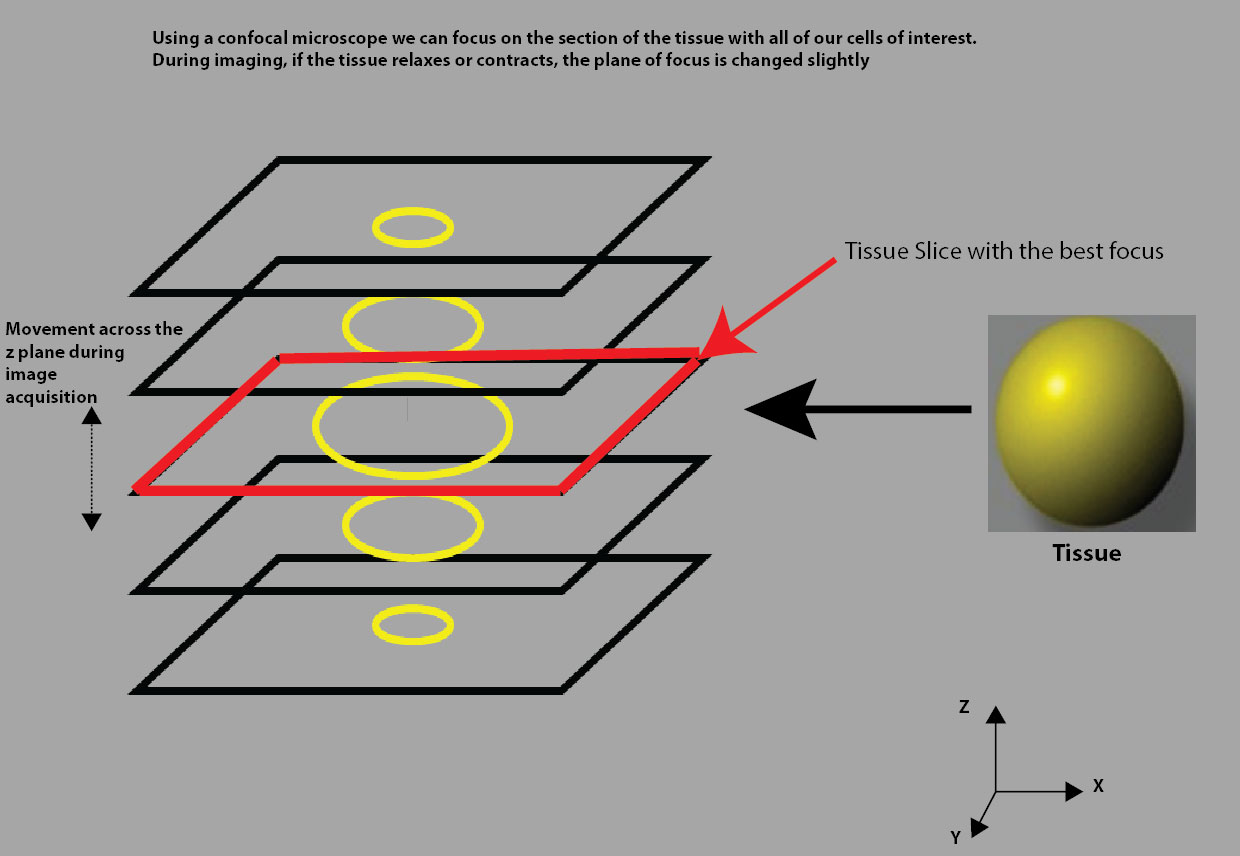

In [1]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import pandas as pd


sns.set()#setting seaborn defaults for graphing

'''data for green and red channels from the "calibration stack", where green is the signal of interest and red is the 
background or independent signal
'''
g=[922.488,1186.203,2074.515,4171.015,7925.77,8109.196,5328.794,3115.899,2067.868]
r=[529.908,542.592,566.025,934.629,1158.797,1290.092,817.985,715.12,687.99]
z=np.arange(1,10,1) 
#thickness of the image stack; In this case we took 10 slices
#example:
Image(filename='example_confocal.jpg')



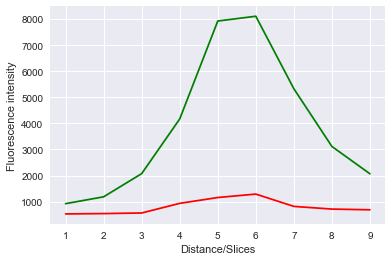

In [2]:
plt.xlabel('Distance/Slices')
plt.ylabel('Fluorescence intensity')
plt.plot(z,g,'g')
plt.plot(z,r,'r')

In [3]:
#Is it a good idea to use interpolation to get the corresponding value of green to red?
f=interpolate.interp1d(r, g,fill_value="extrapolate") #extrapolate makes sure any values outside the range will be extrapolated, not sure how good this is
#measuring time series data

#An ROI is selected and if rnew is the values from an ROI during the whole course of imaging:
df = pd.read_excel('time series.xlsx') #read the excel file containing green signal and red background from the ROI
rnew=df['R']
#ideally I should be able to get the background for green, gnew from by the following

g_correction=f(rnew)

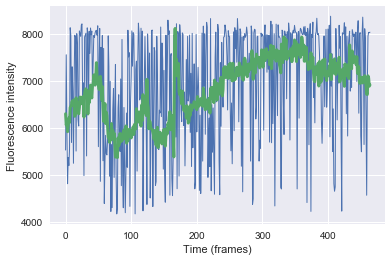

In [4]:
plt.xlabel('Time (frames)')
plt.ylabel('Fluorescence intensity')
plt.plot(g_correction,linewidth=1)
plt.plot(df['G'],linewidth=3)
#green line is the raw calcium signal and blue is the interpolated green signal from red background

In [ ]:
''' How can I use this to correct for background?'''